In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Lista de rutas de las imágenes
rutas_imagenes_white_patch = [
    'test_blue.png',
    'test_green.png',
    'test_red.png',
    'wp_blue.jpg',
    'wp_green.png',
    'wp_green2.jpg',
    'wp_red.png',
    'wp_red2.jpg'
]

rutas_imagenes_coord_cromaticas = [
    'CoordCrom_1.png',
    'CoordCrom_2.png',
    'CoordCrom_3.png'
]

In [50]:
# Función para calcular el histograma de una imagen
def calcular_histograma(imagen):
    histograma = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    return histograma.flatten()

# Definir la función de white_patch
def white_patch(image):
    max_rgb = np.max(image, axis=(0, 1), keepdims=True)
    corrected_img = (image / max_rgb) * 255.0
    return np.clip(corrected_img, 0, 255).astype(np.uint8)

def to_chromatic_coords(image):
    float_img = np.array(image, dtype=float)
    sum_rgb = np.sum(float_img, axis=2, keepdims=True)
    sum_rgb[sum_rgb == 0] = 1  # Evitar división por cero
    chromatic_coords_img = float_img / sum_rgb
    return chromatic_coords_img

def mostrar_imagenes(algoritmo,imagen_original,img_modificada):
    # Mostrar la imagen original y la imagen modificada
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if algoritmo == 'white_patch':
        plt.imshow(cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img_modificada)
    plt.title('Imagen Modificada con '+algoritmo)
    plt.axis('off')

    plt.show()

def mostrar_histogramas(algoritmo,imagen_original,img_modificada):
    hist_original = calcular_histograma(imagen_original)
    if algoritmo == 'white_patch':
        # Calcular los histogramas de las imágenes original y con White Patch
        hist_white_patch = calcular_histograma(img_modificada)

        # Mostrar los histogramas
        plt.figure(figsize=(10, 6))
        plt.plot(hist_original, color='b', label='Original')
        plt.plot(hist_white_patch, color='r', label='White Patch')
        plt.title('Histogramas de la imagen original y con '+ algoritmo)
        plt.xlabel('Intensidad de píxel')
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()
    else:
        print(f"Lllego coordenadas cromáticas")

        # Calcular el histograma para cada canal por separado
        hist_canal1, _ = np.histogram(img_modificada[:,:,0], bins=256, range=(0, 1))
        hist_canal2, _ = np.histogram(img_modificada[:,:,1], bins=256, range=(0, 1))
        hist_canal3, _ = np.histogram(img_modificada[:,:,2], bins=256, range=(0, 1))
        
        # Mostrar los histogramas
        plt.figure(figsize=(10, 6))
        plt.plot(hist_original, color='b', label='Original')
        plt.plot(hist_canal1, color='r', label='Canal 1 (Coord. Cromáticas)')
        plt.plot(hist_canal2, color='g', label='Canal 2 (Coord. Cromáticas)')
        plt.plot(hist_canal3, color='purple', label='Canal 3 (Coord. Cromáticas)')
        plt.title('Histogramas de la imagen original y sus canales en coordenadas cromáticas')
        plt.xlabel('Intensidad de píxel')
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()



In [51]:
def aplicarAlgoritmo(algoritmo,imagen_original):

    # Aplicar white_patch a la imagen original
    if algoritmo == 'white_patch':
        img_mod = white_patch(imagen_original)

        # Normalizar los valores de píxeles en el rango de 0 a 255
        img_modificada = cv2.normalize(img_mod, None, 0, 255, cv2.NORM_MINMAX)
    else:
        # Si la condición es falsa, imprimir otro mensaje
        img_modificada = to_chromatic_coords(imagen_original)
        
    # Mostrar la imagen original y la imagen en coordenadas cromáticas
    mostrar_imagenes(algoritmo,imagen_original,img_modificada)
    mostrar_histogramas(algoritmo,imagen_original,img_modificada)
   



In [52]:
def ejecutar_algotimo(algoritmo,rutas_imagenes):
    # Cargar cada imagen y agregarla a la lista
    for ruta in rutas_imagenes:
        ruta_completa=algoritmo+'/' + ruta
        imagen = cv2.imread(ruta_completa)
        if imagen is not None:
            aplicarAlgoritmo(algoritmo, imagen)
        else:
            print(f"No se pudo cargar la imagen: {ruta_completa}")



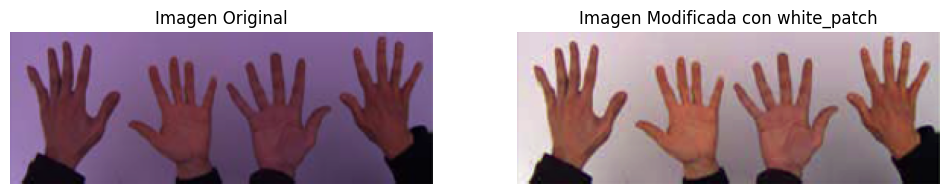

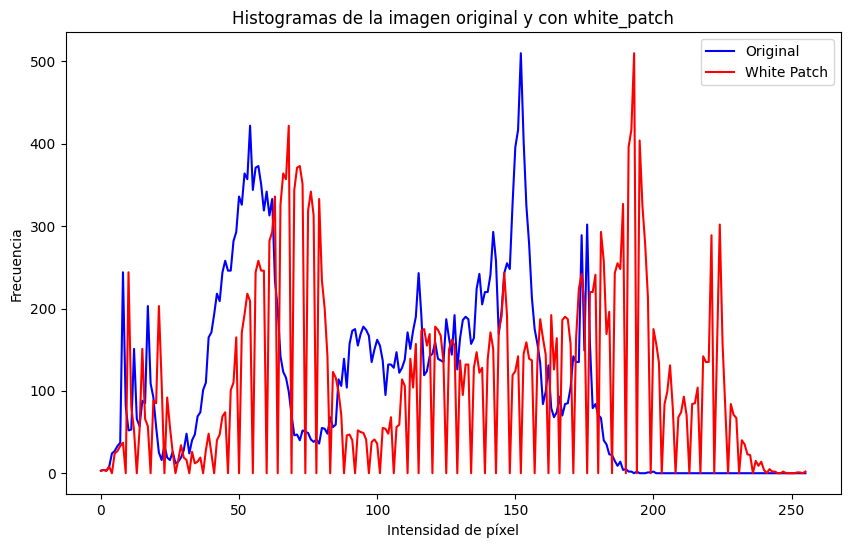

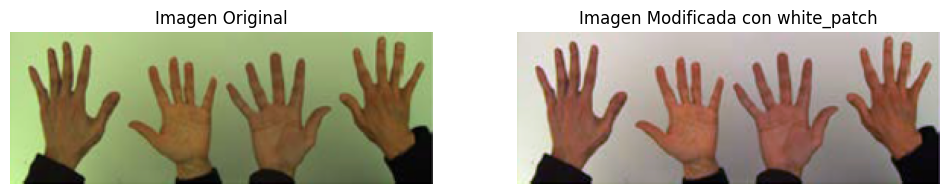

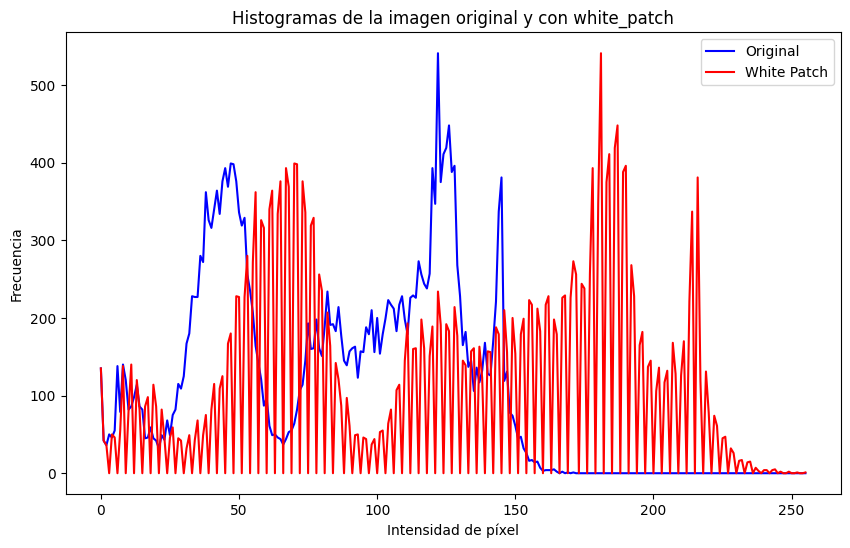

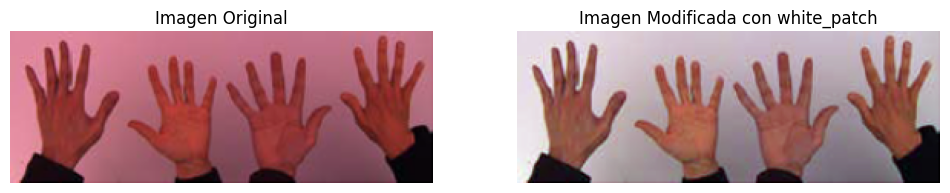

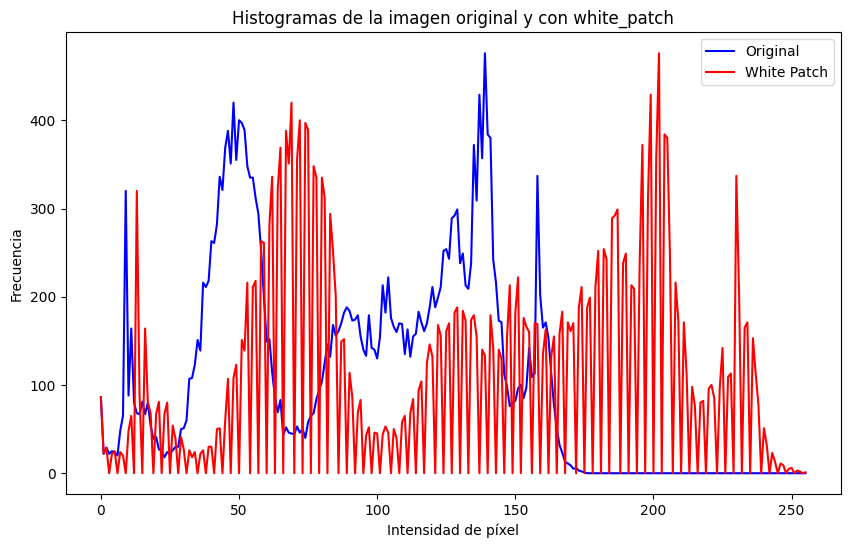

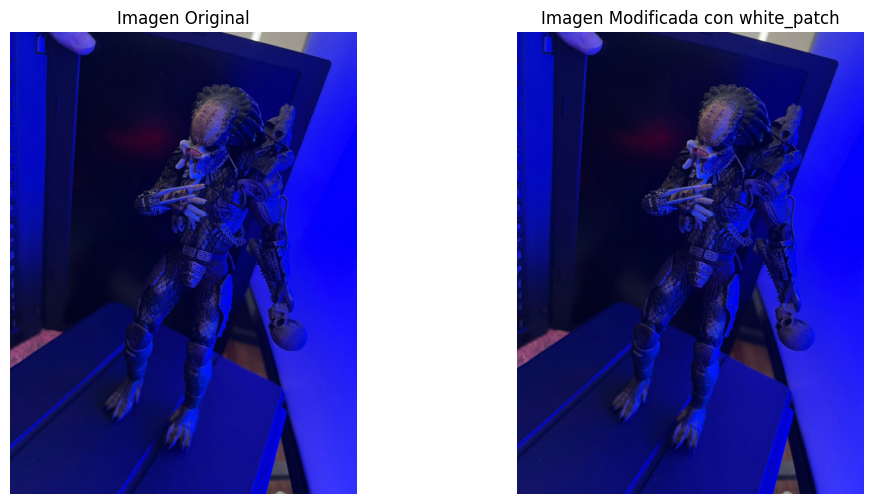

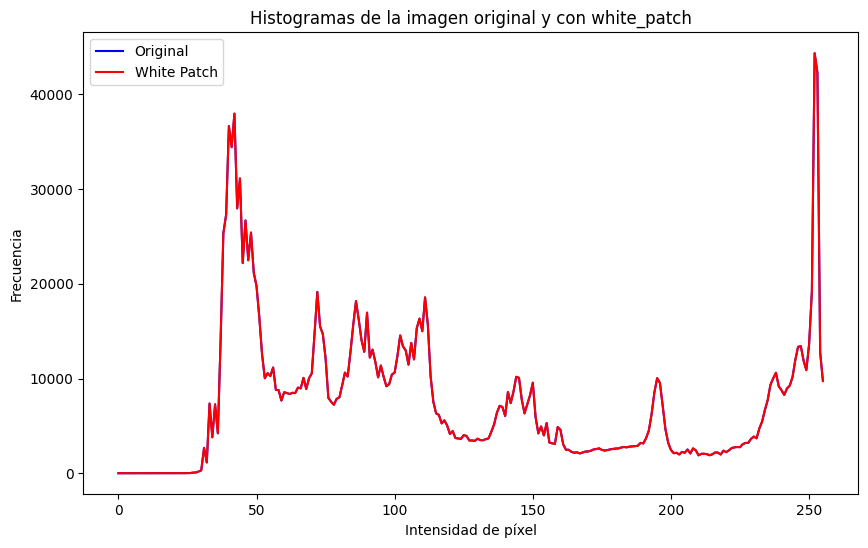

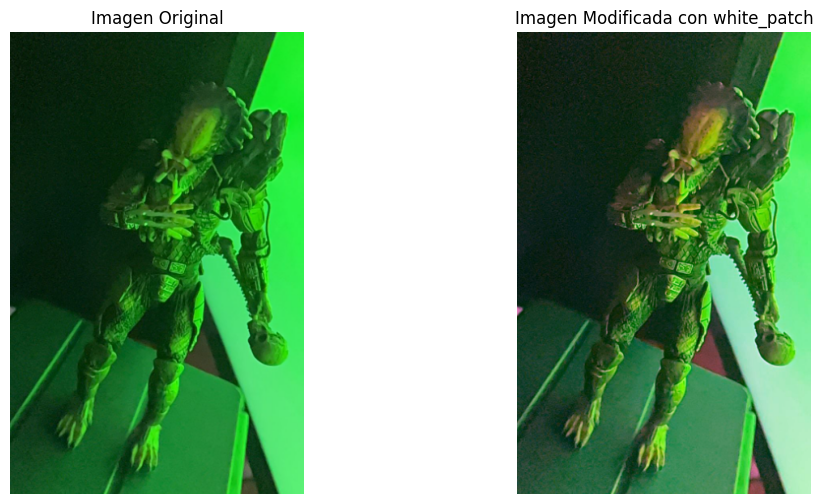

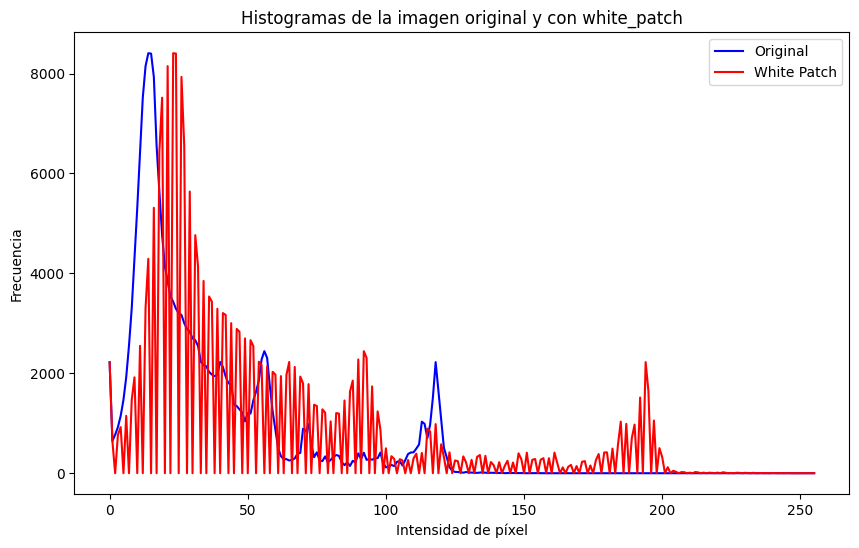

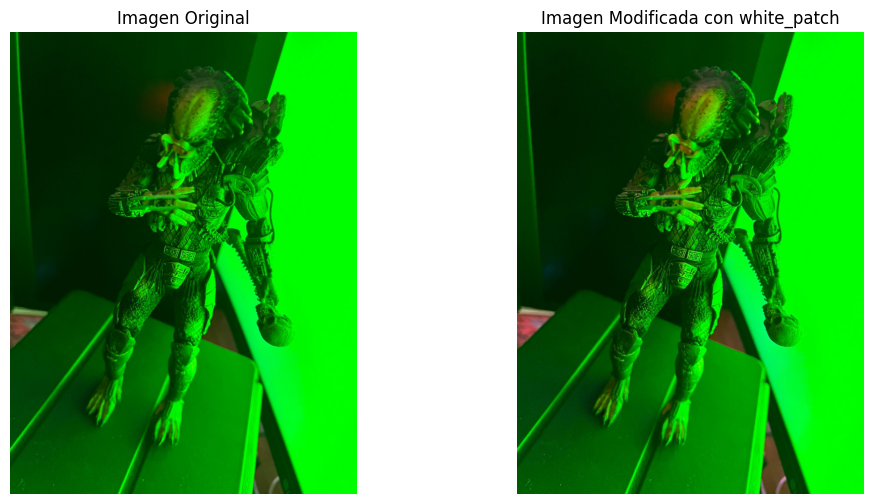

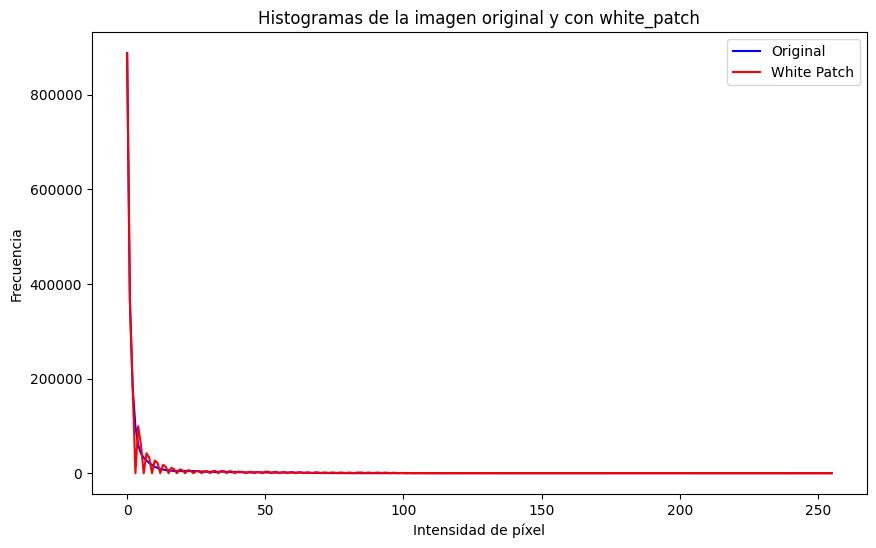

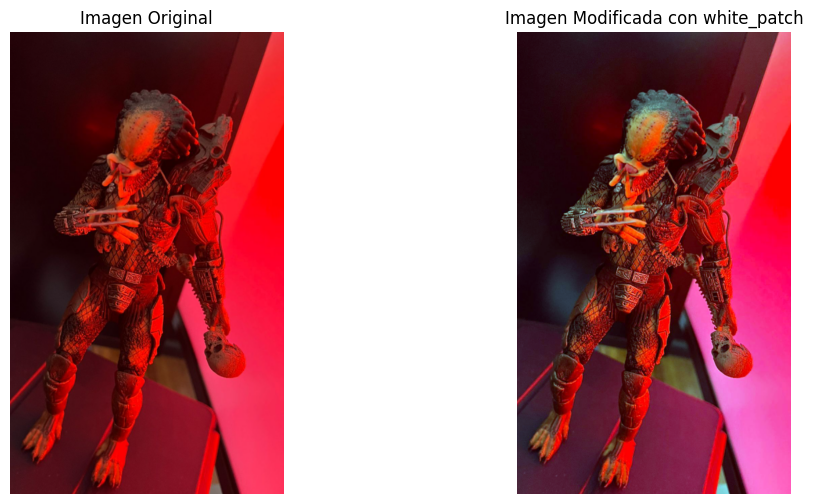

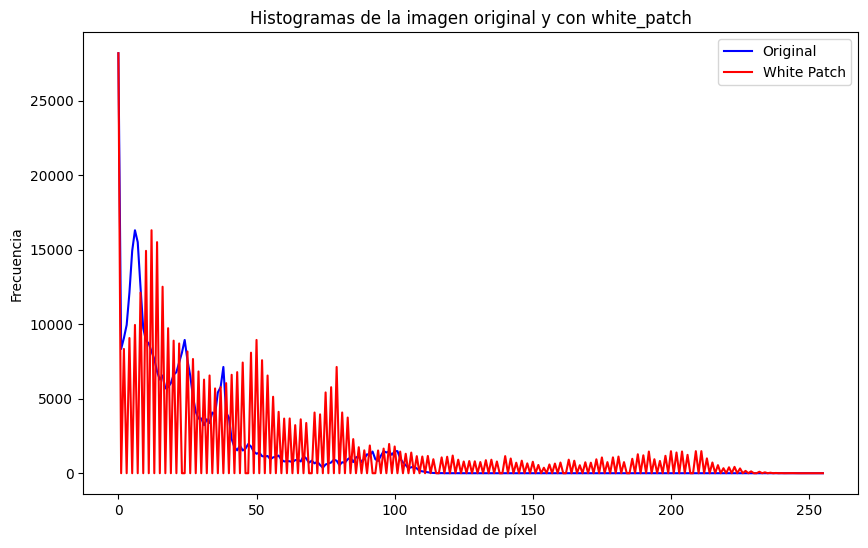

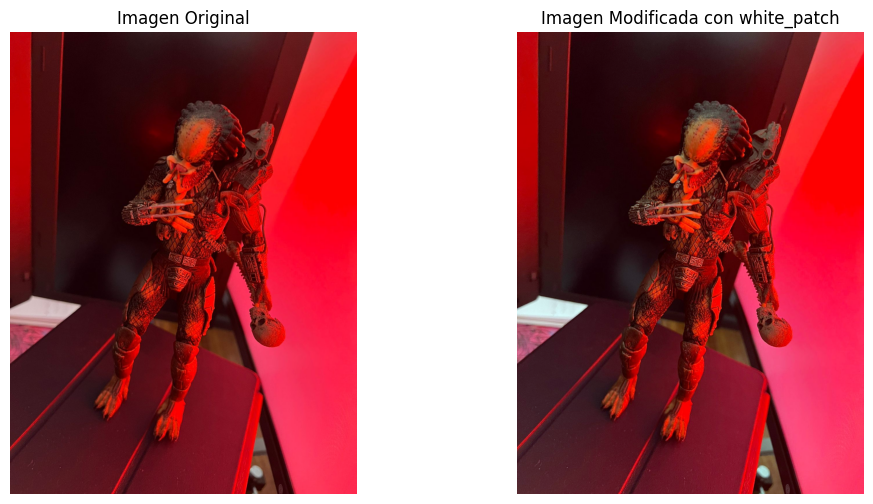

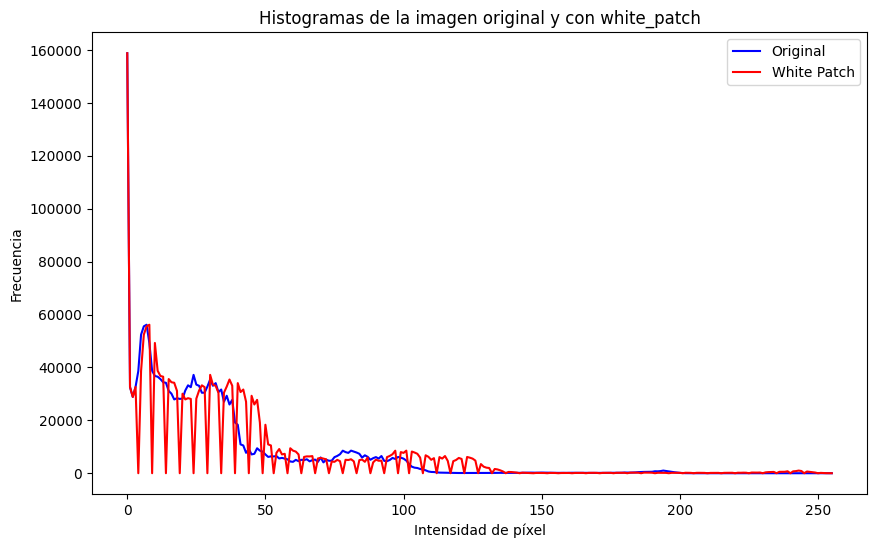

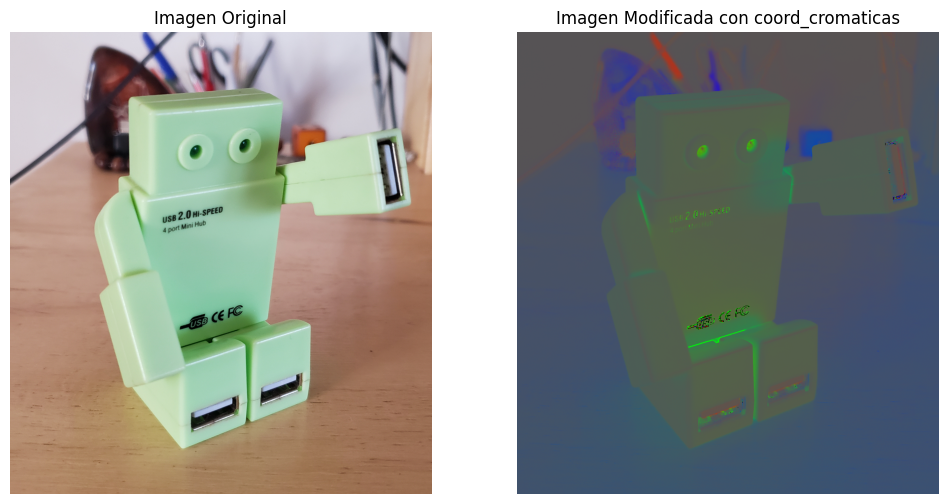

Lllego coordenadas cromáticas


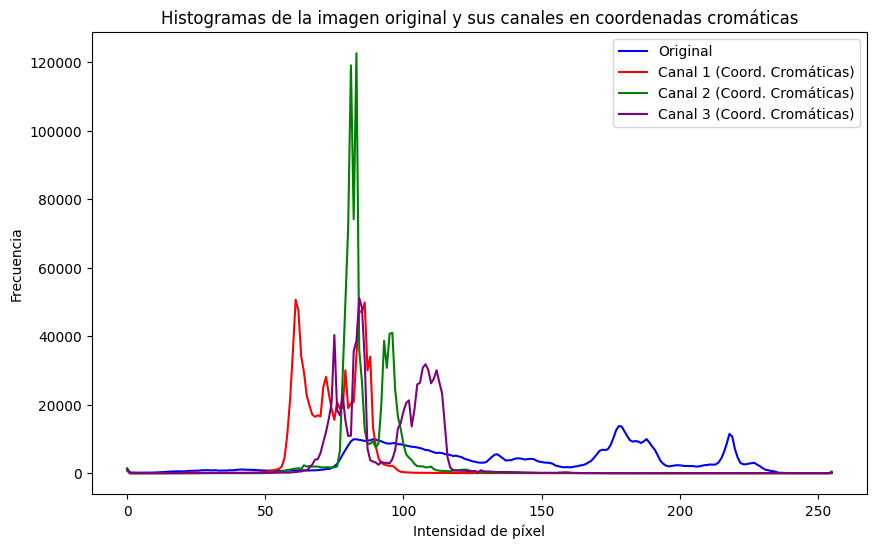

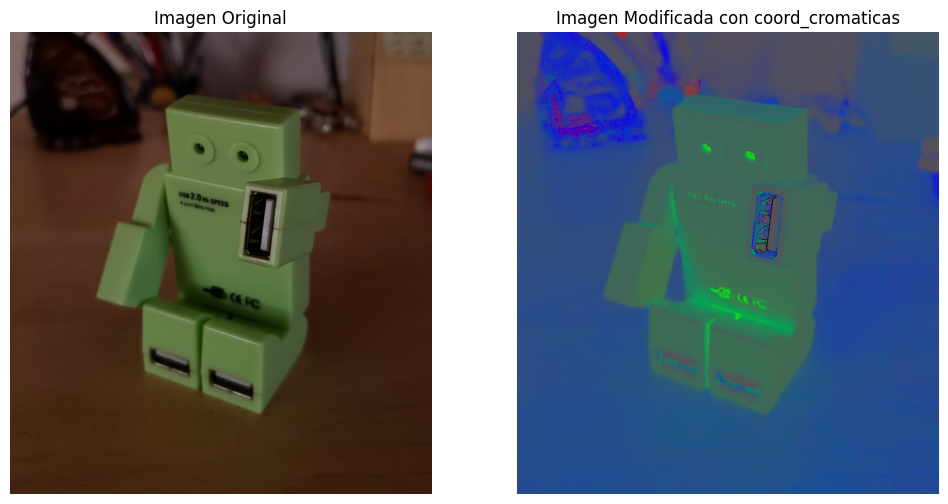

Lllego coordenadas cromáticas


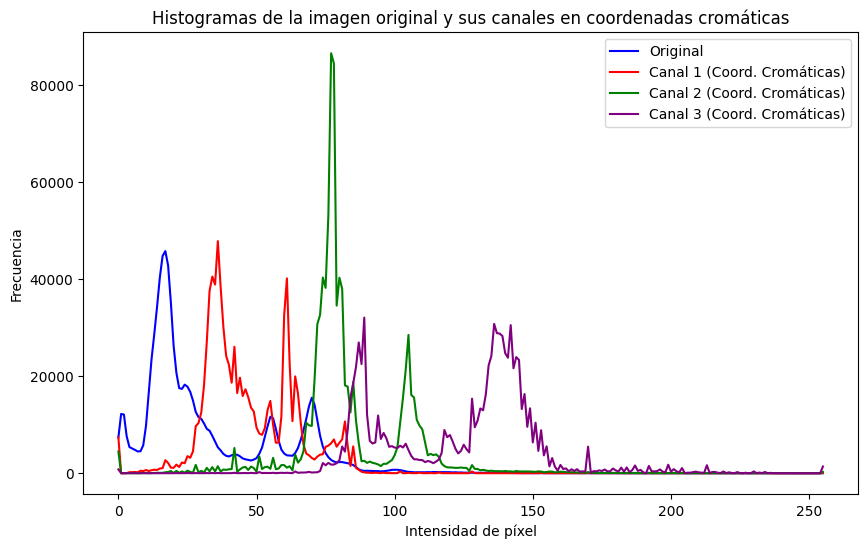

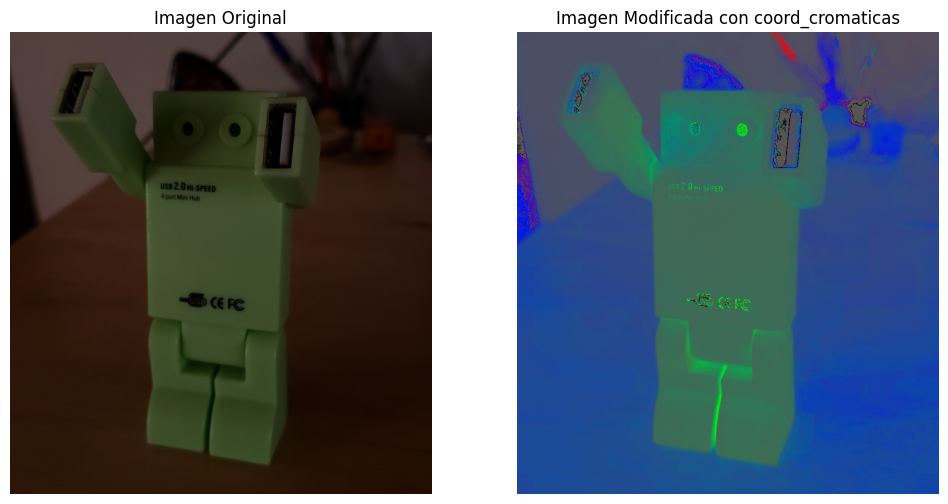

Lllego coordenadas cromáticas


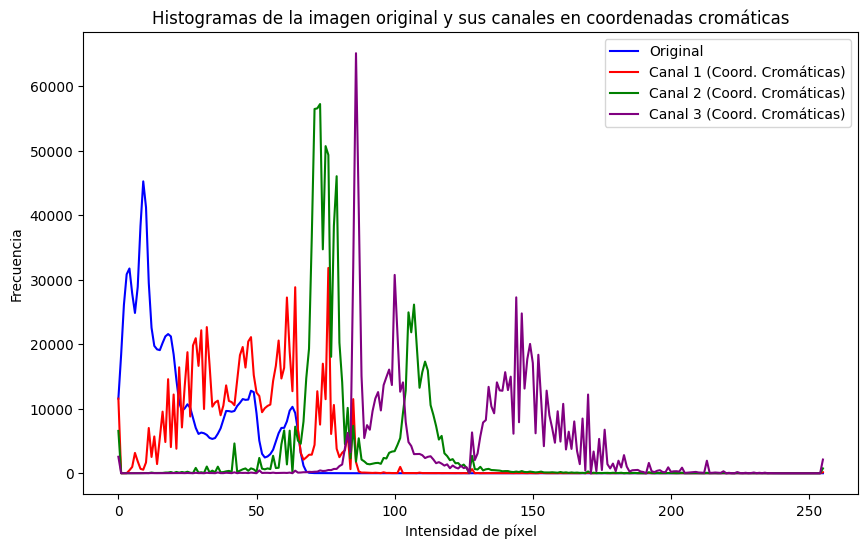

In [53]:
ejecutar_algotimo('white_patch',rutas_imagenes_white_patch)
ejecutar_algotimo('coord_cromaticas',rutas_imagenes_coord_cromaticas)